In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from verstack.stratified_continuous_split import scsplit # pip install verstack

# Load the training data
data_all = pd.read_csv("data/train.csv")


#print(data_all["retweet_count"])
data = data_all["retweet_count"]
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random

In [3]:
print(data.describe())

count    665777.000000
mean        147.687398
std        2972.051181
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      942572.000000
Name: retweet_count, dtype: float64


In [4]:
data.head()

0    0
1    0
2    0
3    0
4    0
Name: retweet_count, dtype: int64

In [5]:
data_all.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,False,68460,1101,1226,NaN,NaN,NaN,Smh I give up
1,1,1588464948124,0,False,309,51,202,NaN,NaN,NaN,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,False,3241,1675,2325,NaN,NaN,NaN,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,False,32327,667,304,NaN,NaN,NaN,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,False,581,42,127,NaN,NaN,NaN,May ALMIGHTY ALLAH have mercy on us all. Only ...


In [6]:
data[data<10]


0         0
1         0
2         0
3         0
4         0
         ..
665772    0
665773    1
665774    8
665775    0
665776    0
Name: retweet_count, Length: 565349, dtype: int64

In [7]:
c = data[data>10]
c

17          26
24          12
43          28
51         281
58          27
          ... 
665734      11
665741     223
665757      52
665765      31
665770    1122
Name: retweet_count, Length: 96740, dtype: int64

In [15]:
c

17          26
24          12
43          28
51         281
58          27
          ... 
665734      11
665741     223
665757      52
665765      31
665770    1122
Name: retweet_count, Length: 96740, dtype: int64

In [20]:
c.describe()

count     96740.000000
mean       1011.736086
std        7740.635775
min          11.000000
25%          22.000000
50%          57.000000
75%         234.000000
max      942572.000000
Name: retweet_count, dtype: float64

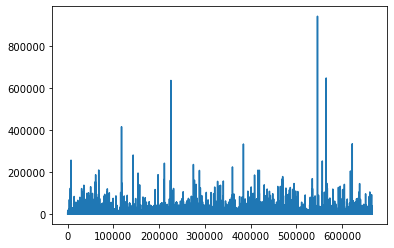

In [8]:

#plt.hist(data, bins=np.arange(c.min(), c.max()+1))
#plt.plot(c.retweet_count)
plt.plot(c)

In [9]:
cleaned = data_all[data_all.retweet_count>10]
cleaned = cleaned[cleaned.retweet_count<1000]


In [10]:
cleaned.describe()
cleaned.retweet_count.describe()

count    86488.000000
mean       125.907282
std        185.656172
min         11.000000
25%         20.000000
50%         45.000000
75%        137.000000
max        999.000000
Name: retweet_count, dtype: float64

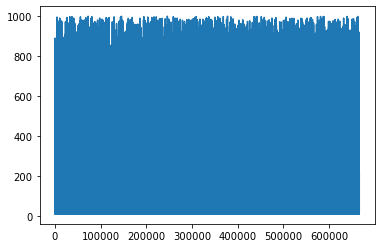

In [11]:
plt.plot(cleaned.retweet_count)

(array([61100.,  9896.,  4901.,  2986.,  2119.,  1622.,  1280.,  1051.,
          829.,   704.]),
 array([ 11. , 109.8, 208.6, 307.4, 406.2, 505. , 603.8, 702.6, 801.4,
        900.2, 999. ]),
 <a list of 10 Patch objects>)

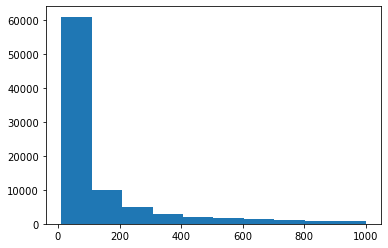

In [12]:
plt.hist(cleaned.retweet_count)

In [13]:
cleaned.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
17,17,1588558918116,26,False,15848,1257,1305,NaN,detroitnews.com/story/news/loc…,NaN,https://t.co/RDAvKv1Lhx
24,24,1588289254894,12,False,10424,3083,1257,NaN,NaN,NaN,The Dartmouth COVID-19 North Testing Site is N...
43,43,1588484890868,28,False,24,146,76,NaN,twitter.com/i/web/status/1…,blockchain,Blockchain Research Institute conducted the 'B...
51,51,1588688264242,281,False,79044,17001,16738,NaN,NaN,NaN,San Diego proud! Love my city! 🇺🇸❤️🇺🇸
58,58,1588477023061,27,True,292187,1670714,1207,NaN,abc.net.au/news/2020-05-0…,NaN,'Why are you treating them like this': Securit...


In [14]:
modified = data_all.copy()

In [15]:
modified.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,False,68460,1101,1226,NaN,NaN,NaN,Smh I give up
1,1,1588464948124,0,False,309,51,202,NaN,NaN,NaN,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,False,3241,1675,2325,NaN,NaN,NaN,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,False,32327,667,304,NaN,NaN,NaN,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,False,581,42,127,NaN,NaN,NaN,May ALMIGHTY ALLAH have mercy on us all. Only ...


In [16]:
modified.user_verified = (modified.user_verified).astype(int)
modified.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,NaN,NaN,NaN,Smh I give up
1,1,1588464948124,0,0,309,51,202,NaN,NaN,NaN,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,0,3241,1675,2325,NaN,NaN,NaN,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,0,32327,667,304,NaN,NaN,NaN,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,0,581,42,127,NaN,NaN,NaN,May ALMIGHTY ALLAH have mercy on us all. Only ...


In [17]:

modified.user_mentions = modified.user_mentions.fillna(0)
modified.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,NaN,NaN,Smh I give up
1,1,1588464948124,0,0,309,51,202,0,NaN,NaN,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,0,3241,1675,2325,0,NaN,NaN,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,0,32327,667,304,0,NaN,NaN,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,0,581,42,127,0,NaN,NaN,May ALMIGHTY ALLAH have mercy on us all. Only ...


In [18]:
modified.user_mentions = modified.user_mentions.apply(lambda x: 1 if type(x) is str and x!=0 else 0) 
modified[modified.user_mentions == 1]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
25,25,1588363712119,1,0,68914,2053,4994,1,twitter.com/i/web/status/1…,SpaceForDistancing,Looks like a good opportunity for you to work ...
26,26,1588669533975,1,0,72180,3360,1488,1,ouest-france.fr/sante/virus/co…,"Coronavirus, Virus",Coronavirus. La quasi-totalité des marins du C...
64,64,1588687404195,4,0,4072,1963,646,1,twitter.com/i/web/status/1…,NaN,Social distancing in informal settlements can ...
68,68,1588356596689,3,0,8644,1513,1024,1,twitter.com/i/web/status/1…,ThePowerOfPresence,"As of this morning, 264 people have signed up ..."
76,76,1588290489345,13,0,87828,129053,37,1,twitter.com/i/web/status/1…,NaN,Brazil | 346 deaths from coronavirus in 24hs. ...
...,...,...,...,...,...,...,...,...,...,...,...
665711,665711,1588360459957,1,1,57034,61790,18042,1,twitter.com/i/web/status/1…,NaN,"Chicago comedians @megindurti, @ChrisTrani and..."
665716,665716,1588291330279,10,0,70204,16719,18245,1,twitter.com/i/web/status/1…,NaN,@JoeySalads WALKOUT: term used for mass number...
665734,665734,1588536065592,11,1,17328,11197,2769,1,twitter.com/i/web/status/1…,COVID19,What can be done to help people experiencing i...
665761,665761,1588603257102,3,1,26983,18970,962,1,twitter.com/i/web/status/1…,NaN,@VanathiBJP @narendramodi @PMOIndia @JPNadda @...


In [19]:
modified[modified.user_mentions == 0]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,NaN,NaN,Smh I give up
1,1,1588464948124,0,0,309,51,202,0,NaN,NaN,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,0,3241,1675,2325,0,NaN,NaN,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,0,32327,667,304,0,NaN,NaN,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,0,581,42,127,0,NaN,NaN,May ALMIGHTY ALLAH have mercy on us all. Only ...
...,...,...,...,...,...,...,...,...,...,...,...
665771,665771,1588333084482,0,0,63,4,12,0,NaN,NaN,Was supposed to be on my way to long Island NY...
665772,665772,1588412684317,0,0,65355,1984,1902,0,NaN,NaN,18 months dawg? Come on man...
665774,665774,1588353174952,8,0,888,85,257,0,twitter.com/i/web/status/1…,NaN,"'Post it' pearls for Palliative, End of Life a..."
665775,665775,1588691378352,0,0,452,38,91,0,NaN,NaN,His facial expressions are kind of looking for...


In [20]:

modified.urls = modified.urls.fillna(0)

modified.urls = modified.urls.apply(lambda x: 1 if type(x) is str and x!=0 else 0) 


In [21]:
modified[modified.urls == 1]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
6,6,1588692966869,2,0,372,738,472,0,1,Ethiopia,Extremely valid points being made here 👇🏾 #Eth...
7,7,1588316892450,1,0,2085,3808,153,0,1,NaN,COVID-19 dominated the discussion Tuesday at a...
10,10,1588635076990,2,0,39684,13381,5247,0,1,NaN,Man Caught With Pipe Bombs Was Planning Armed ...
11,11,1588342979489,5,0,2430,3798,2061,0,1,NaN,Quarantine measures imposed as a response to t...
13,13,1588364452751,2,0,5865,10047,9741,0,1,"coronavirus, AnimalCruelty",Why does Superstitious times Stupid always equ...
...,...,...,...,...,...,...,...,...,...,...,...
665757,665757,1588698631822,52,1,884,40368,127,0,1,APFightsCorona,YS Jagan to launch first made in Andhra Prades...
665761,665761,1588603257102,3,1,26983,18970,962,1,1,NaN,@VanathiBJP @narendramodi @PMOIndia @JPNadda @...
665770,665770,1588469265376,1122,0,71029,53758,1187,0,1,NaN,The NHS was protected from overload by forcing...
665773,665773,1588324521711,1,0,1807,2029,347,1,1,COVID19,Thank you to all of the nurses in our @Stanfor...


In [22]:
modified[modified.urls == 0]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,0,NaN,Smh I give up
1,1,1588464948124,0,0,309,51,202,0,0,NaN,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,0,3241,1675,2325,0,0,NaN,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,0,32327,667,304,0,0,NaN,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,0,581,42,127,0,0,NaN,May ALMIGHTY ALLAH have mercy on us all. Only ...
...,...,...,...,...,...,...,...,...,...,...,...
665769,665769,1588492759697,0,0,100904,1391,993,0,0,NaN,Every word is perfect
665771,665771,1588333084482,0,0,63,4,12,0,0,NaN,Was supposed to be on my way to long Island NY...
665772,665772,1588412684317,0,0,65355,1984,1902,0,0,NaN,18 months dawg? Come on man...
665775,665775,1588691378352,0,0,452,38,91,0,0,NaN,His facial expressions are kind of looking for...


In [23]:
modified.hashtags = modified.hashtags.fillna(0)

modified.hashtags = modified.hashtags.apply(lambda x: 1 if type(x) is str and x!=0 else 0) 


In [24]:
modified[modified.hashtags == 0]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,0,0,Smh I give up
1,1,1588464948124,0,0,309,51,202,0,0,0,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,0,3241,1675,2325,0,0,0,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,0,32327,667,304,0,0,0,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,0,581,42,127,0,0,0,May ALMIGHTY ALLAH have mercy on us all. Only ...
...,...,...,...,...,...,...,...,...,...,...,...
665771,665771,1588333084482,0,0,63,4,12,0,0,0,Was supposed to be on my way to long Island NY...
665772,665772,1588412684317,0,0,65355,1984,1902,0,0,0,18 months dawg? Come on man...
665774,665774,1588353174952,8,0,888,85,257,0,1,0,"'Post it' pearls for Palliative, End of Life a..."
665775,665775,1588691378352,0,0,452,38,91,0,0,0,His facial expressions are kind of looking for...


In [25]:
modified[modified.hashtags != 1]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,0,0,Smh I give up
1,1,1588464948124,0,0,309,51,202,0,0,0,"Most of us are Human Beings, but I think you m..."
2,2,1588634673360,0,0,3241,1675,2325,0,0,0,"Old dirty tricks Trump, at it again...like we ..."
3,3,1588433158672,0,0,32327,667,304,0,0,0,Seriously..... I worked 86 hours my last check...
4,4,1588582751599,0,0,581,42,127,0,0,0,May ALMIGHTY ALLAH have mercy on us all. Only ...
...,...,...,...,...,...,...,...,...,...,...,...
665771,665771,1588333084482,0,0,63,4,12,0,0,0,Was supposed to be on my way to long Island NY...
665772,665772,1588412684317,0,0,65355,1984,1902,0,0,0,18 months dawg? Come on man...
665774,665774,1588353174952,8,0,888,85,257,0,1,0,"'Post it' pearls for Palliative, End of Life a..."
665775,665775,1588691378352,0,0,452,38,91,0,0,0,His facial expressions are kind of looking for...


In [26]:
modified[modified.hashtags == 1]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
6,6,1588692966869,2,0,372,738,472,0,1,1,Extremely valid points being made here 👇🏾 #Eth...
13,13,1588364452751,2,0,5865,10047,9741,0,1,1,Why does Superstitious times Stupid always equ...
16,16,1588322520125,1,0,16893,3054,3514,0,0,1,NEW SOCIAL DISTANCING HANDSHAKES SURGE IN THE ...
25,25,1588363712119,1,0,68914,2053,4994,1,1,1,Looks like a good opportunity for you to work ...
26,26,1588669533975,1,0,72180,3360,1488,1,1,1,Coronavirus. La quasi-totalité des marins du C...
...,...,...,...,...,...,...,...,...,...,...,...
665734,665734,1588536065592,11,1,17328,11197,2769,1,1,1,What can be done to help people experiencing i...
665745,665745,1588642454693,8,0,9494,23362,212,0,1,1,"As we continue to face #COVID19, we need each ..."
665757,665757,1588698631822,52,1,884,40368,127,0,1,1,YS Jagan to launch first made in Andhra Prades...
665765,665765,1588593885642,31,0,27918,19878,2477,0,0,1,A great video from #Singapore raising awarenes...


In [27]:
modified.text = modified.text.fillna(0)

modified.text = modified.text.apply(lambda x: len(x) if type(x) is str and x!=0 else 0) 

In [28]:
modified[modified.text != 0]

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,0,0,13
1,1,1588464948124,0,0,309,51,202,0,0,0,69
2,2,1588634673360,0,0,3241,1675,2325,0,0,0,99
3,3,1588433158672,0,0,32327,667,304,0,0,0,88
4,4,1588582751599,0,0,581,42,127,0,0,0,89
...,...,...,...,...,...,...,...,...,...,...,...
665772,665772,1588412684317,0,0,65355,1984,1902,0,0,0,30
665773,665773,1588324521711,1,0,1807,2029,347,1,1,1,167
665774,665774,1588353174952,8,0,888,85,257,0,1,0,302
665775,665775,1588691378352,0,0,452,38,91,0,0,0,104


In [29]:
#data cleaned and ready for modelling now
modified.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,0,0,13
1,1,1588464948124,0,0,309,51,202,0,0,0,69
2,2,1588634673360,0,0,3241,1675,2325,0,0,0,99
3,3,1588433158672,0,0,32327,667,304,0,0,0,88
4,4,1588582751599,0,0,581,42,127,0,0,0,89


In [30]:
modified.describe()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
count,665777.000000,6.657770e+05,665777.000000,665777.000000,6.657770e+05,6.657770e+05,6.657770e+05,665777.000000,665777.000000,665777.000000,665777.000000
mean,332888.000000,1.588500e+12,147.687398,0.133294,4.167295e+04,2.329881e+05,2.743131e+03,0.081545,0.321549,0.108822,107.570931
std,192193.409422,1.390942e+08,2972.051181,0.339892,9.848516e+04,2.442260e+06,1.725410e+04,0.273671,0.467071,0.311416,89.805648
min,0.000000,1.588284e+12,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,166444.000000,1.588358e+12,0.000000,0.000000,2.352000e+03,2.060000e+02,2.290000e+02,0.000000,0.000000,0.000000,38.000000
50%,332888.000000,1.588513e+12,0.000000,0.000000,1.080400e+04,1.002000e+03,6.390000e+02,0.000000,0.000000,0.000000,77.000000
75%,499332.000000,1.588625e+12,2.000000,0.000000,3.809900e+04,6.012000e+03,1.746000e+03,0.000000,1.000000,0.000000,150.000000
max,665776.000000,1.588716e+12,942572.000000,1.000000,7.203222e+06,1.170640e+08,4.399078e+06,1.000000,1.000000,1.000000,987.000000


In [31]:
y = modified.retweet_count
y.head()

0    0
1    0
2    0
3    0
4    0
Name: retweet_count, dtype: int64

In [32]:
y = y.apply(lambda x: 1 if x>10 else 0)

In [33]:
y[y==1] #lables of our data

17        1
24        1
43        1
51        1
58        1
         ..
665734    1
665741    1
665757    1
665765    1
665770    1
Name: retweet_count, Length: 96740, dtype: int64

In [34]:
x= modified.copy()
x.head()

,id,timestamp,retweet_count,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,0,68460,1101,1226,0,0,0,13
1,1,1588464948124,0,0,309,51,202,0,0,0,69
2,2,1588634673360,0,0,3241,1675,2325,0,0,0,99
3,3,1588433158672,0,0,32327,667,304,0,0,0,88
4,4,1588582751599,0,0,581,42,127,0,0,0,89


In [35]:
x = x.drop('retweet_count', 1)
x.head() #split the data now

,id,timestamp,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,0,1588696955143,0,68460,1101,1226,0,0,0,13
1,1,1588464948124,0,309,51,202,0,0,0,69
2,2,1588634673360,0,3241,1675,2325,0,0,0,99
3,3,1588433158672,0,32327,667,304,0,0,0,88
4,4,1588582751599,0,581,42,127,0,0,0,89


In [37]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5)
# kf.get_n_splits(x)


In [53]:
%%time
from sklearn import tree
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, x, y, cv=5)




CPU times: user 27.7 s, sys: 86.7 ms, total: 27.8 s
Wall time: 27.8 s


In [54]:

# #  x and y ready for training 
# for train_index, test_index in kf.split(x):
#     X_train, X_test = x[train_index], x[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     clf = clf.fit(X_train, y_train)
print(scores)

[0.29448917 0.87421521 0.87654238 0.87652736 0.84367091]


In [48]:
%%time
depth = []
for i in range(3,10):
    clf = tree.DecisionTreeClassifier(max_depth=i)   
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.8945067192167949), (4, 0.8943925668805021), (5, 0.8974085917657113), (6, 0.8990352625578836), (7, 0.8346758749551277), (8, 0.835462925273778), (9, 0.824023659573701)]


In [49]:
# tree.plot_tree(clf) #depth of 5 looks the best

In [50]:
len(modified[modified.retweet_count > 300])

21112

In [58]:
%%time
len(modified[modified.retweet_count <= 300])


CPU times: user 11.7 ms, sys: 19.5 ms, total: 31.2 ms
Wall time: 28.6 ms


644665

In [52]:
%%time
from sklearn.ensemble import RandomForestClassifier
depth = []
for i in range(3,10):
    clf = RandomForestClassifier(max_depth=i, random_state=0)  
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)



[(3, 0.8903656930173316), (4, 0.8948161321283251), (5, 0.8965524492435156), (6, 0.8990397685711581), (7, 0.9008797239916669), (8, 0.8355275114640488), (9, 0.8117192393248791)]


In [61]:
%%time
from sklearn.ensemble import RandomForestClassifier
depth = []
for i in range(7,8): # 7 worked best before
    clf = RandomForestClassifier(max_depth=i, random_state=0)  
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)


[(7, 0.9008797239916669)]
CPU times: user 142 ms, sys: 128 ms, total: 271 ms
Wall time: 2min 31s


In [59]:
%%time


CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 12.2 µs


In [68]:
y_300 = modified.retweet_count

In [69]:
y_300 = y_300.apply(lambda x: 1 if x>300 else 0)

In [71]:
len(y_300[y_300==1])

21112

In [72]:
%%time
depth = []
for i in range(7,8): # 7 worked best before
    clf = RandomForestClassifier(max_depth=i, random_state=0)  
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y_300, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(7, 0.9696174544930211)]
CPU times: user 138 ms, sys: 133 ms, total: 271 ms
Wall time: 2min 30s


In [ ]:
#sampling and dealing with unbalancing data + working with threshold 300 as victor is working

In [164]:
#in this I will try sampling random 21112 samples from x < 300 so we have a more balanced dataset


x_less_300 = modified[modified.retweet_count<=300]
x_greater_300 = modified[modified.retweet_count>300]
print(x_less_300.head())
print(x_less_300.shape)
print(len(x_less_300))
print(len(x_greater_300))

x_sampled = pd.concat([x_less_300.sample(n=21112, random_state=1), x_greater_300], axis=0)
#x_sampled = x_sampled.drop(x_sampled.columns[0], axis=1)
print(len(x_sampled))
print(len(x_sampled[x_sampled.retweet_count<=300]))
print(len(x_sampled[x_sampled.retweet_count>300]))


y_sampled = x_sampled.retweet_count
y_sampled = y_sampled.apply(lambda x: 1 if x>300 else 0)
print(len(y_sampled))

x_sampled = x_sampled.drop('retweet_count', 1)

# print()

# print(len(y_sampled[y_sampled==0]))
# print(len(y_sampled[y_sampled==1]))
print(x_sampled.shape)
print(x_sampled.head())

   id      timestamp  retweet_count  user_verified  user_statuses_count  \
0   0  1588696955143              0              0                68460   
1   1  1588464948124              0              0                  309   
2   2  1588634673360              0              0                 3241   
3   3  1588433158672              0              0                32327   
4   4  1588582751599              0              0                  581   

   user_followers_count  user_friends_count  user_mentions  urls  hashtags  \
0                  1101                1226              0     0         0   
1                    51                 202              0     0         0   
2                  1675                2325              0     0         0   
3                   667                 304              0     0         0   
4                    42                 127              0     0         0   

   text  
0    13  
1    69  
2    99  
3    88  
4    89  
(644665, 11)
644665


In [166]:
%%time
depth = []
for i in range(1,5): # 7 worked best before
    clf = RandomForestClassifier(max_depth=i, random_state=0)  
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x_sampled, y=y_sampled, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)


[(1, 0.822020651762031), (2, 0.8214522546419099), (3, 0.7236879499810535), (4, 0.7234037514209929)]
CPU times: user 161 ms, sys: 19.4 ms, total: 180 ms
Wall time: 12.3 s


In [167]:
#pick 2 for now
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_sampled, y_sampled)

x_reback_normal = modified.copy()


y_reback = x_reback_normal.retweet_count

y_reback = y_reback.apply(lambda x: 1 if x>300 else 0)
x_reback_normal = x_reback_normal.drop('retweet_count', 1)
print(x_sampled)

            id      timestamp  user_verified  user_statuses_count  \
127791  127791  1588695001861              0                53773   
326348  326348  1588693662972              1                34875   
192744  192744  1588535616357              0               106207   
588303  588303  1588355738120              1                91214   
471703  471703  1588388942647              0                61006   
...        ...            ...            ...                  ...   
665688  665688  1588295882904              0                28675   
665692  665692  1588694992250              1                 6014   
665703  665703  1588347783746              1                 4269   
665732  665732  1588647767866              1                 1173   
665770  665770  1588469265376              0                71029   

        user_followers_count  user_friends_count  user_mentions  urls  \
127791                   806                 101              0     0   
326348                 82

In [168]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_reback_normal)
classification_report(y_reback, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.83      0.90    644665\n           1       0.14      0.85      0.24     21112\n\n    accuracy                           0.83    665777\n   macro avg       0.57      0.84      0.57    665777\nweighted avg       0.97      0.83      0.88    665777\n'

In [169]:
y_diff = y_reback - y_pred
print(len(y_diff[y_diff == 0]))
print(len(y_diff[y_diff == 1]))

550755
3125


In [170]:

#Trying on the evaluation dataset
validation_data = pd.read_csv("data/evaluation.csv")

In [171]:
validation_data.head()

,id,timestamp,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,665776,1588644489777,False,229,36,99,NaN,NaN,NaN,"Coronavirus, no spring break, Chris Brown fan ..."
1,665777,1588463988413,True,106991,41273,326,NaN,NaN,NaN,This fits the data.
2,665778,1588563932106,False,24127,345,200,NaN,NaN,NaN,Y’all talk about the Coronavirus like y’all be...
3,665779,1588639210045,True,771,6555,83,NaN,twitter.com/i/web/status/1…,NaN,"As this coronavirus and covid-19 go on, the fo..."
4,665780,1588692867357,False,32595,6490,1206,NaN,vice.com/en_us/article/…,NaN,Big Brother is not very good at watching you. ...


In [172]:
validation_data.user_verified = (validation_data.user_verified).astype(int)
validation_data.user_mentions = validation_data.user_mentions.fillna(0)
validation_data.user_mentions = validation_data.user_mentions.apply(lambda x: 1 if type(x) is str and x!=0 else 0) 
validation_data.urls = validation_data.urls.fillna(0)

validation_data.urls = validation_data.urls.apply(lambda x: 1 if type(x) is str and x!=0 else 0) 
validation_data.hashtags = validation_data.hashtags.fillna(0)

validation_data.hashtags = validation_data.hashtags.apply(lambda x: 1 if type(x) is str and x!=0 else 0) 
validation_data.text = validation_data.text.fillna(0)

validation_data.text = validation_data.text.apply(lambda x: len(x) if type(x) is str and x!=0 else 0) 


In [173]:
validation_data.head()

,id,timestamp,user_verified,user_statuses_count,user_followers_count,user_friends_count,user_mentions,urls,hashtags,text
0,665776,1588644489777,0,229,36,99,0,0,0,93
1,665777,1588463988413,1,106991,41273,326,0,0,0,19
2,665778,1588563932106,0,24127,345,200,0,0,0,124
3,665779,1588639210045,1,771,6555,83,0,1,0,297
4,665780,1588692867357,0,32595,6490,1206,0,1,0,69


In [178]:
print(clf)
print("Features sorted by their score:")
print(clf.feature_importances_)

RandomForestClassifier(max_depth=2, random_state=0)
Features sorted by their score:
[0.         0.02393429 0.23174166 0.00878673 0.41271502 0.00580867
 0.00075515 0.16134086 0.00658806 0.14832956]


In [179]:
y_validation = clf.predict(validation_data)
x_sampled = x_sampled.drop(x_sampled.columns[0], axis=1)
print(x_sampled)

            timestamp  user_verified  user_statuses_count  \
127791  1588695001861              0                53773   
326348  1588693662972              1                34875   
192744  1588535616357              0               106207   
588303  1588355738120              1                91214   
471703  1588388942647              0                61006   
...               ...            ...                  ...   
665688  1588295882904              0                28675   
665692  1588694992250              1                 6014   
665703  1588347783746              1                 4269   
665732  1588647767866              1                 1173   
665770  1588469265376              0                71029   

        user_followers_count  user_friends_count  user_mentions  urls  \
127791                   806                 101              0     0   
326348                 82947               18048              0     1   
192744                  1874                 471

In [180]:
print(y_validation[y_validation==1])


[1 1 1 ... 1 1 1]


In [185]:
print(np.count_nonzero(y_validation==1))
print(np.count_nonzero(y_validation==0))
print(y.head())

55701
229633
0    0
1    0
2    0
3    0
4    0
Name: retweet_count, dtype: int64


In [184]:
from numpy import savetxt
savetxt('validation_classes.csv', y_validation, delimiter=',')

In [188]:
validation_classified = pd.read_csv("data/evaluation.csv")
validation_classified['classes'] = y_validation.tolist()
print(validation_classified.head())
validation_classified.to_csv("classified_data.csv")

In [189]:
print(validation_classified.head())

       id      timestamp  user_verified  user_statuses_count  \
0  665776  1588644489777          False                  229   
1  665777  1588463988413           True               106991   
2  665778  1588563932106          False                24127   
3  665779  1588639210045           True                  771   
4  665780  1588692867357          False                32595   

   user_followers_count  user_friends_count user_mentions  \
0                    36                  99           NaN   
1                 41273                 326           NaN   
2                   345                 200           NaN   
3                  6555                  83           NaN   
4                  6490                1206           NaN   

                          urls hashtags  \
0                          NaN      NaN   
1                          NaN      NaN   
2                          NaN      NaN   
3  twitter.com/i/web/status/1…      NaN   
4     vice.com/en_us/article/…   